# ATHENS 2018
# Practice of Large Scale Machine Learning 

## Exam part MLP (2018/11/23)

For any remark or suggestion, please feel free to contact us at:
geoffroy.peeters@telecom-paristech.fr

### Objective:
We want to implement a two layers MLP (1 hidden layer) in Python.

We therefore need to implement the
- forward propagation
- compute the cost (average of the loss over training data)
- backward propagation
- update_parameters

### Your task:
You need to add the missing part in the code (between # --- START CODE HERE and # --- END CODE HERE)

### Note 

The code is written as a python class (in order to be able to pass all the variables easely from one function to the other).

To use a given variable, you need to use ```self.$VARIABLE_NAME```, such as````self.W````,```self.b```, ... (see the code already written).

### Testing

For testing your code, you can use the provide code in the last cells (loop over epochs and display of the loss decrease).
You should a cost which decreases (largely) over epochs.

In [0]:
%matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt 

In [0]:
class MLP:
    W1 = []
    b1 = []
    W2 = []
    b1 = []
    Z1 = []
    A1 = []
    Z2 = []
    A2 = []
    dW1 = []
    db1 = []
    dW2 = []
    db2 = []
    dZ1 = []
    dZ2 = []
    
    def __init__(self, n_x, n_h, n_y):
        self.W1 = np.random.randn(n_h, n_x) * 0.01
        self.b1 = np.zeros(shape=(n_h, 1))
        self.W2 = np.random.randn(n_y, n_h) * 0.01
        self.b2 = np.zeros(shape=(n_y, 1))
        return

    def forward_propagation(self, X):
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = np.tanh(self.Z1)        
        # --- START CODE HERE
        self.Z2 = np.dot(self.W2,self.A1)+self.b2
        self.A2 = sigmoid(self.Z2)
        haty = self.A2
        # --- END CODE HERE
        return haty

    def backward_propagation(self, X, Y):
        m = Y.shape[1]
        self.dZ2 = self.A2 - Y
        self.dW2 = (1 / m) * np.dot(self.dZ2, self.A1.T)
        self.db2 = (1 / m) * np.sum(self.dZ2, axis=1, keepdims=True)
        self.dA1 = np.dot(self.W2.T, self.dZ2)
        # --- START CODE HERE
        n=self.A1.shape[1]
        self.dZ1 = self.dA1
        self.dW1 = (1/n)*np.dot(self.dZ1,X.T)
        self.db1 = (1/n)*np.sum(self.dZ1,axis=1,keepdims=True)
        # --- END CODE HERE
        return 
                          
    def update_parameters(self, learning_rate):
        # --- START CODE HERE
        self.W1 = self.W1-learning_rate*self.dW1
        self.b1 = self.b1-learning_rate*self.db1
        self.W2 = self.W2-learning_rate*self.dW2
        self.b2 = self.b2-learning_rate*self.db2
        # --- END CODE HERE
        return
                          
        
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_cost(hat_Y, Y):
    m = Y.shape[1]
    # --- START CODE HERE
    loss = Y-hat_Y*Y-hat_Y
    # --- END CODE HERE
    cost = np.sum(loss) / m
    return cost

In [0]:
dataset = datasets.make_classification(1000, 4, n_classes=2)
x_train = dataset[0].T
y_train = dataset[1]
y_train = y_train.reshape(1, len(y_train))

In [17]:
# Instantiate the class MLP with providing 
# the size of the various layers (input=4, hidden=10, outout=1) 

myMLP = MLP(4, 10, 1)

num_epoch = 400
cost = []
# Run over epochs
for i in range(0, num_epoch):
    haty = myMLP.forward_propagation(x_train)
    
    # --- Store the current Cost (average of loss) for future plotting
    cost.append(compute_cost(haty, y_train))
    print("epoch: {} cost: {}".format(i, cost))
    
    myMLP.backward_propagation(x_train, y_train)
    myMLP.update_parameters(learning_rate=0.1)

epoch: 0 cost: [-0.24995455278009837]
epoch: 1 cost: [-0.24995455278009837, -0.24996850886101393]
epoch: 2 cost: [-0.24995455278009837, -0.24996850886101393, -0.24998190209486087]
epoch: 3 cost: [-0.24995455278009837, -0.24996850886101393, -0.24998190209486087, -0.24999492352102134]
epoch: 4 cost: [-0.24995455278009837, -0.24996850886101393, -0.24998190209486087, -0.24999492352102134, -0.25000775756090576]
epoch: 5 cost: [-0.24995455278009837, -0.24996850886101393, -0.24998190209486087, -0.24999492352102134, -0.25000775756090576, -0.2500205846411932]
epoch: 6 cost: [-0.24995455278009837, -0.24996850886101393, -0.24998190209486087, -0.24999492352102134, -0.25000775756090576, -0.2500205846411932, -0.25003358373800616]
epoch: 7 cost: [-0.24995455278009837, -0.24996850886101393, -0.24998190209486087, -0.24999492352102134, -0.25000775756090576, -0.2500205846411932, -0.25003358373800616, -0.25004693487783153]
epoch: 8 cost: [-0.24995455278009837, -0.24996850886101393, -0.24998190209486087, -

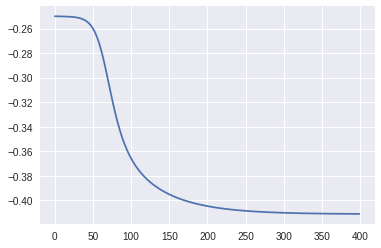

In [18]:
plt.plot(cost)

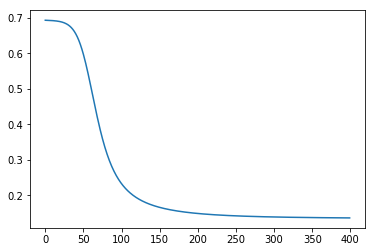

In [0]:
plt.plot(cost)

In [19]:
import keras

Using TensorFlow backend.


In [27]:
from keras.models import Sequential
from keras.layers import Activation,Conv2D,MaxPooling2D,Flatten,Dense

#We suppose that there are 10 classes of output
y_kind=10 
#We suppose the shape of image is (28,28,1)
x_train_shape=(28,28,1)
#We design two convolutional layers and two pooling layers to reduce the complexity.
model=Sequential()
model.add(Conv2D(6,(3,3),padding='same',input_shape=x_train_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(y_kind,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 16)        880       
_________________________________________________________________
activation_11 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
__________